<a href="https://colab.research.google.com/github/Wishmi-Sasika/MLOM-Labs/blob/main/MLOM_Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Training_data'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Testing_data'

In [ ]:
# Importing the libraries
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = tf.keras.models.Sequential ([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color

    # This is the first convolution
    tf.keras.layers.Conv2D (filters=16, kernel_size=3, activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D (2, 2),

    # The second convolution
    tf.keras.layers.Conv2D (filters=16, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D (pool_size=2),

    # The third convolution
    tf.keras.layers.Conv2D (filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D (pool_size=2),

    # The forth convolution
    tf.keras.layers.Conv2D (filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D (pool_size=2),

    # The fifth convolution
    tf.keras.layers.Conv2D (filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D (pool_size=2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neurons in the hidden layer
    tf.keras.layers.Dense (512, activation='relu'),

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Cat') and 1 for the other ('Dog')
    tf.keras.layers.Dense (1, activation='sigmoid')
])

In [ ]:
# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 35, 35, 32)       0

In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam (learning_rate=0.001)
model.compile (optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model from generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All train images will be rescaled by 1./255
train_datagen = ImageDataGenerator (rescale = 1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory (train_path,  # This is the source directory for training images
                                                     target_size = (300, 300),  # All images will be resized to 150x150
                                                     batch_size = 32,
                                                     # Since we use binary_crossentropy loss, we need binary labels
                                                     class_mode = 'binary')

# All test images wull be rescaled by 1./255
test_datagen = ImageDataGenerator (rescale = 1./255)

# Apply predefined specification to test dataset
test_set = test_datagen.flow_from_directory (valid_path,
                                        target_size = (300, 300),
                                        batch_size = 32,
                                        class_mode = 'binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
# Fit the model into the dataset
history = model.fit (
    train_generator,
    steps_per_epoch=20,   # Number of batches per epoch
    epochs=5,
    validation_data=test_set,
    validation_steps=7    # Number of batches per validation
)

# Training loss         Testing data set loss
# loss decrease         It depends (can be increased or decreased)
# accuracy increase     It depends (can be increased or decreased)

Epoch 1/5
20/20 [==============================] - 169s 8s/step - loss: 0.6725 - accuracy: 0.6035 - val_loss: 0.7129 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 65s 3s/step - loss: 0.6454 - accuracy: 0.6082 - val_loss: 0.7130 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 65s 3s/step - loss: 0.6172 - accuracy: 0.6872 - val_loss: 0.6900 - val_accuracy: 0.5850
Epoch 4/5
20/20 [==============================] - 65s 3s/step - loss: 0.5923 - accuracy: 0.6872 - val_loss: 0.6334 - val_accuracy: 0.6350
Epoch 5/5
20/20 [==============================] - 78s 4s/step - loss: 0.5750 - accuracy: 0.6951 - val_loss: 0.7107 - val_accuracy: 0.5450


In [ ]:
# Can save the model and download
model.save_weights ('first_try.h5')

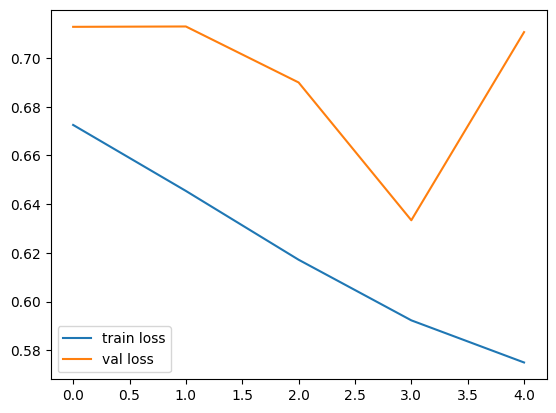

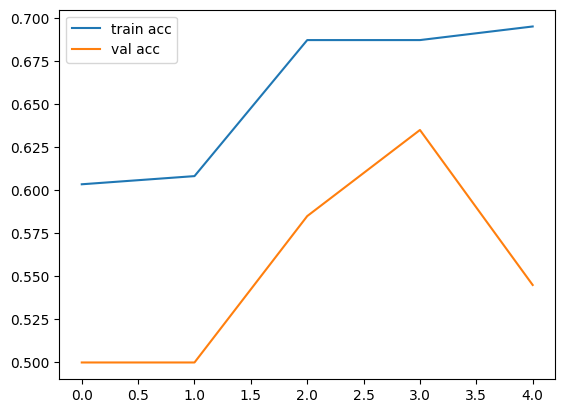

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot variation in loss and accuracy

import matplotlib.pyplot as plt

# Plot the loss
plt.plot (history.history ['loss'], label='train loss')
plt.plot (history.history ['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig ('LossVal_loss')

# Plot the accuracy
plt.plot (history.history ['accuracy'], label='train acc')
plt.plot (history.history ['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig ('AccVal_acc')